**QUESTION**:

The level of phytic acid in urine samples was determined by a catalytic fluorimetric (CF) method and the results were compared with those obtained using an established extraction photometric (EP) technique. The results, in mg/L, are the means of triplicate measurements, as given in EP_CF.csv


(a) Is the new method (CF) a good substitute for the established method (EP) for measuring the level of phytic acid in urine? Justify your conclusion using linear regression between the two methods for different modelling assumptions regarding the accuracy of the respective measurement techniques.


(b) Estimate the level of phytic acid in urine if EP measurement is 2.31 mg/l and provide 95% confidence interval for the estimate.

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phytic-acid-levels/EP_CF.xlsx


Reading the phytic-acid-levels data

In [54]:
acid_levels=pd.read_excel("/kaggle/input/phytic-acid-levels/EP_CF.xlsx")

ERROR! Session/line number was not unique in database. History logging moved to new session 16


Importing the necessary libraries.

In [55]:
import matplotlib .pyplot as plt
import pandas as pd
import statsmodels .api as sm
from statsmodels .formula.api import ols

In [56]:
# printing the top 5 rows to check whether all columns are there or not.
print(acid_levels.head())
# printing the information about the dataframe to check the existence of null values.
acid_levels.info()

     EP    CF
0  1.98  1.87
1  2.31  2.20
2  3.29  3.15
3  3.56  3.42
4  1.23  1.10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EP      20 non-null     float64
 1   CF      20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


Visualizing the data using scatter plot.

Text(0, 0.5, 'CF')

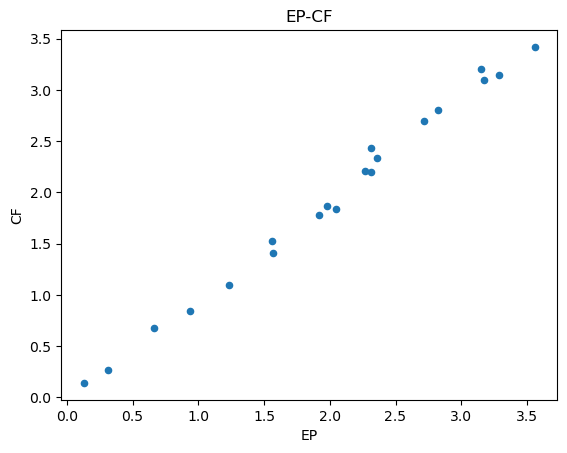

In [57]:
acid_levels.plot("EP","CF",kind="scatter")
plt.title("EP-CF")
plt.xlabel("EP")
plt.ylabel("CF")

In statsmodels, ordinary least-squares linear models are specified via the function ols (short for ordinary least-squares).

In [58]:
# Building the ols model between CF and EP
model = ols("CF~EP", data=acid_levels)
model_matrix = pd. DataFrame (model.exog ,columns=model. exog_names )
print( model_matrix )

    Intercept    EP
0         1.0  1.98
1         1.0  2.31
2         1.0  3.29
3         1.0  3.56
4         1.0  1.23
5         1.0  1.57
6         1.0  2.05
7         1.0  0.66
8         1.0  0.31
9         1.0  2.82
10        1.0  0.13
11        1.0  3.15
12        1.0  2.72
13        1.0  2.31
14        1.0  1.92
15        1.0  1.56
16        1.0  0.94
17        1.0  2.27
18        1.0  3.17
19        1.0  2.36


In [59]:
#fit the model defined above
fit = model.fit ()
b0 , b1 = fit.params
print(fit.params)

Intercept   -0.049713
EP           0.992415
dtype: float64


The above output gives the least-squares estimates of β0 and β1.

Visualizing the data with the Regression line using scatter plot.

Text(0, 0.5, 'CF')

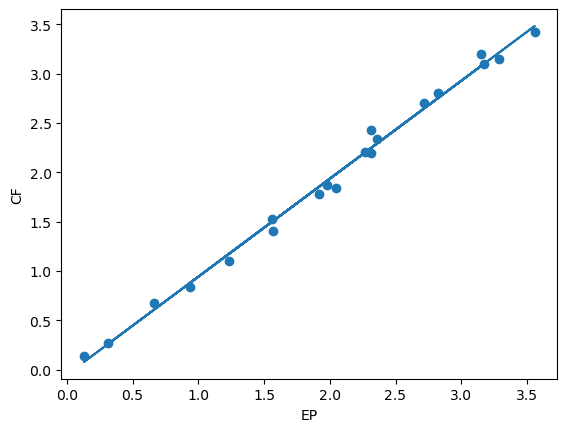

In [60]:
plt.plot(acid_levels.EP , b0 + b1*acid_levels.EP)
plt.scatter(acid_levels.EP , acid_levels.CF)
plt.xlabel("EP")
plt.ylabel("CF")

Although ols performs a complete analysis of the linear model, not all its calculations
need to be presented. A summary of the results can be obtained with the method summary.

In [61]:
print(fit.summary ())

                            OLS Regression Results                            
Dep. Variable:                     CF   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2670.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           5.03e-21
Time:                        07:53:38   Log-Likelihood:                 22.483
No. Observations:                  20   AIC:                            -40.97
Df Residuals:                      18   BIC:                            -38.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0497      0.043     -1.158      0.2

The main output items are the following:

• **coef**: Estimates of the parameters of the regression line.

• **std error**: Standard deviations of the estimators of the regression line. These are the square roots of the variances of the {bβi} obtained.

• **t**: Realization of test statistics associated with the hypotheses H0 : βi = 0 and H1 : βi , 0, i = 0, 1. In particular, the outcome of T.

• **P>|t|** : P-value of test (two-sided test).

• **[0.025 0.975]**: 95% confidence intervals for the parameters.

• R-**Squared**: Coefficient of determination R2 (percentage of variation explained by the regression)

• **Adj. R-Squared**: adjusted R2

• F-**statistic**: Realization of the F test statistic associated with testing the full model against the default model. The associated degrees of freedom (Df Model and Df Residuals) are given, as is the P-value: Prob (F-statistic).

• **AIC**: The AIC number is, minus two times the log-likelihood plus two times the number of model parameters.

As the p-value of the Intercept coefficent is greater than 0.005, we can neglect that coefficient and rebuild the model. The Intercept variable can be dropped by adding '-1' to the formula.

Bulding another model without the Intercept variable

In [62]:
model2 = ols("CF~EP-1", data=acid_levels)
fit2 = model2.fit () #fit the model defined above
b00  = fit2.params
print(fit2.params)

EP    0.972349
dtype: float64


The above output gives the least-squares estimates of β0.

In [63]:
print(fit2.summary ())

                                 OLS Regression Results                                
Dep. Variable:                     CF   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.350e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):                    1.45e-28
Time:                        07:53:38   Log-Likelihood:                          21.764
No. Observations:                  20   AIC:                                     -41.53
Df Residuals:                      19   BIC:                                     -40.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the summary above, we can clearly say that the model is well fitted without the Intercept term.

Estimating the level of phytic acid in urine if EP measurement is 2.31 mg/l using **"fit.get_prediction()"** and calculating the 95% confidence interval for the estimate using **"summary_frame"** using model2 which is without Intercept term.

In [64]:
x={"EP":2.31}
pred2 = fit2. get_prediction (x)
pred2. summary_frame (alpha =0.05).unstack ()

mean           0    2.246127
mean_se        0    0.019328
mean_ci_lower  0    2.205672
mean_ci_upper  0    2.286582
obs_ci_lower   0    2.066499
obs_ci_upper   0    2.425755
dtype: float64

Summary frame of mean, variance and confidence interval.

Returns:
DataFrame
DataFrame containing four columns:

mean

mean_se

mean_ci_lower

mean_ci_upper

Fixes alpha to 0.05 so that the confidence interval should have 95% coverage.

**CONCLUSION 1**:

The level of phytic acid in urine if EP measurement is 2.31 mg/l is 2.246 mg/l.
PredictionResults.summary_frame(alpha=0.05)

The mean_ci column contain the lower and upper bounds of the confidence interval for the prediction of CF. If EP is 2.31mg/l, then the 95% CI for the estimate is **[2.2056,2.2865]**

In [65]:
print(acid_levels.corr())

          EP        CF
EP  1.000000  0.996647
CF  0.996647  1.000000


**CONCLUSION 2**:

The new method (CF) a good substitute for the established method (EP) because the both methods are correlated much and the fitted model suggests that the difference between the measured values for both the techniques is nearly negligible.Also there is no intercept term, it clearly indicates that the CF is 0.97 times the EP.